IMPORT LIBRARY

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset-phishing/dataset_phishing.csv')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Encoding

In [ ]:
data['target'] = pd.get_dummies(data['status'])['legitimate'].astype('int')
data.drop('status',axis = 1, inplace=True)
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [ ]:
from sklearn.model_selection import train_test_split
X = data.copy()
y = X.pop('target')
X = data.drop(columns=['url','target'])
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)

input_shape = [X_train[1].shape]

Input shape is  [(87, 1)]


MODEL

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(units=50, return_sequences=True),
    layers.LSTM(units=50),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1)
])

model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=["acc"])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=41,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=300,
    callbacks=[early_stopping],
)

Epoch 1/300
14/14 [==============================] - 21s 1s/step - loss: 0.2827 - acc: 0.6035 - val_loss: 0.2081 - val_acc: 0.6776
Epoch 2/300
14/14 [==============================] - 13s 922ms/step - loss: 0.2169 - acc: 0.6572 - val_loss: 0.2082 - val_acc: 0.6732
Epoch 3/300
14/14 [==============================] - 13s 918ms/step - loss: 0.2079 - acc: 0.6776 - val_loss: 0.1696 - val_acc: 0.7432
Epoch 4/300
14/14 [==============================] - 13s 906ms/step - loss: 0.1845 - acc: 0.7270 - val_loss: 0.1453 - val_acc: 0.8108
Epoch 5/300
14/14 [==============================] - 13s 923ms/step - loss: 0.1625 - acc: 0.7735 - val_loss: 0.1522 - val_acc: 0.7795
Epoch 6/300
14/14 [==============================] - 13s 919ms/step - loss: 0.1569 - acc: 0.7839 - val_loss: 0.1856 - val_acc: 0.7397
Epoch 7/300
14/14 [==============================] - 13s 936ms/step - loss: 0.1559 - acc: 0.7883 - val_loss: 0.1691 - val_acc: 0.7717
Epoch 8/300
14/14 [==============================] - 13s 932ms/st

Best Validation Loss: 0.0384
Best Validation Accuracy: 0.9543


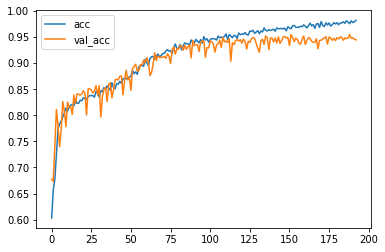

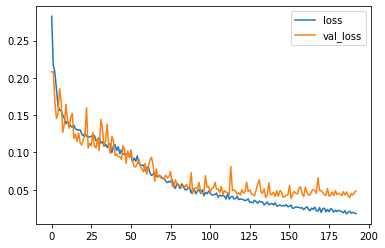

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['acc', 'val_acc']].plot()
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_acc'].max()))

In [ ]:
loss,acc = model.evaluate(X_valid, y_valid)

143/143 [==============================] - 6s 42ms/step - loss: 0.0384 - acc: 0.9543
